In [1]:
import pickle

In [2]:
X_train = pickle.load(open('X_train.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl', 'rb'))
X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

In [3]:
X_train = X_train/255
X_test = X_test/255

In [4]:
print(X_train.shape)
print(X_test.shape)

(19910, 100, 100, 3)
(5090, 100, 100, 3)


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [7]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.001,momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)       2

In [9]:
early_stoping = EarlyStopping(monitor='val_loss',patience= 5,restore_best_weights=True,verbose=1)

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), callbacks=[early_stoping], epochs=30)

Epoch 1/30
623/623 [==============================] - 21s 20ms/step - loss: 0.8692 - accuracy: 0.5799 - val_loss: 0.8280 - val_accuracy: 0.5990
Epoch 2/30
623/623 [==============================] - 8s 13ms/step - loss: 0.7733 - accuracy: 0.6288 - val_loss: 0.7705 - val_accuracy: 0.6328
Epoch 3/30
623/623 [==============================] - 8s 12ms/step - loss: 0.7431 - accuracy: 0.6678 - val_loss: 0.6863 - val_accuracy: 0.7153
Epoch 4/30
623/623 [==============================] - 7s 12ms/step - loss: 0.7131 - accuracy: 0.6871 - val_loss: 0.6670 - val_accuracy: 0.7128
Epoch 5/30
623/623 [==============================] - 7s 12ms/step - loss: 0.6851 - accuracy: 0.7110 - val_loss: 0.6899 - val_accuracy: 0.6980
Epoch 6/30
623/623 [==============================] - 7s 12ms/step - loss: 0.6626 - accuracy: 0.7274 - val_loss: 0.6767 - val_accuracy: 0.7181
Epoch 7/30
623/623 [==============================] - 7s 12ms/step - loss: 0.6398 - accuracy: 0.7455 - val_loss: 0.5841 - val_accuracy: 0.777

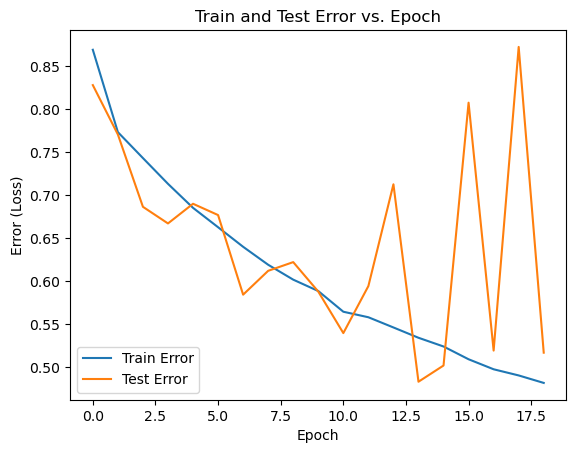

In [11]:
import matplotlib.pyplot as plt

# Plot train error (loss)
plt.plot(history.history['loss'], label='Train Error')
# Plot test error (validation loss)
plt.plot(history.history['val_loss'], label='Test Error')

plt.title('Train and Test Error vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend()
plt.show()

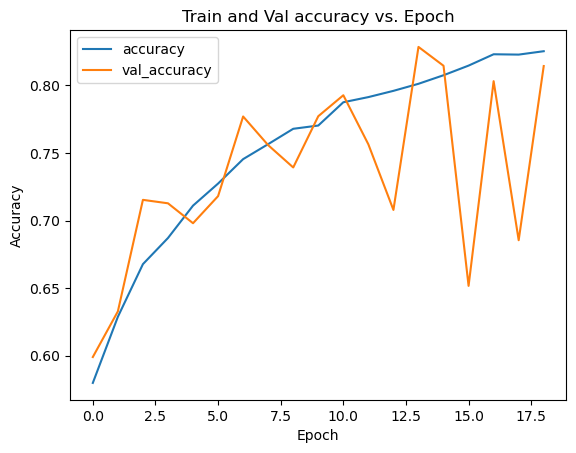

In [12]:
import matplotlib.pyplot as plt

# Plot train error (loss)
plt.plot(history.history['accuracy'], label='accuracy')
# Plot test error (validation loss)
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title('Train and Val accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model.evaluate(X_test,y_test)

160/160 [==============================] - 1s 6ms/step - loss: 0.4827 - accuracy: 0.8285


[0.4827204644680023, 0.8284872174263]